In [36]:
import pandas as pd
import numpy as np

In [37]:
from google.colab import files
uploaded = files.upload()

Saving salary.csv to salary (1).csv


In [42]:
dataset = pd.read_csv('salary.csv')

In [43]:
income_set = set(dataset['income'])
print(income_set)
dataset['income'] = dataset['income'].map({'>50K': 1, '<=50K': 0}).astype(int)
print(dataset['income'])

{'>50K', '<=50K'}
0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int64


In [47]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
error =[]
for i in range(1,40):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  pred_i = model.predict(X_test)
  error.append(np.mean(pred_i != y_test))

<function matplotlib.pyplot.show(close=None, block=None)>

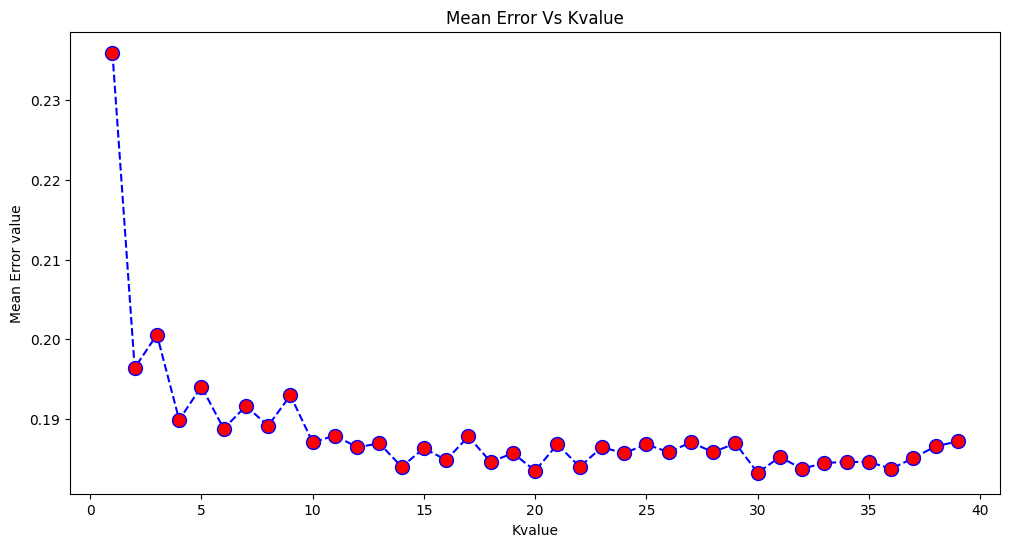

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Mean Error Vs Kvalue')
plt.xlabel('Kvalue')
plt.ylabel('Mean Error value')
plt.show

In [52]:
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=11,metric='minkowski',p=2)
model.fit(X_train,y_train)
pred_y = model.predict(X_test)

print("Accuracy score is: {0}%".format(accuracy_score(y_test,pred_y)*100))

Accuracy score is: 81.2062400196536%


In [55]:
age_ip = int(input("Enter age: "))
edu_ip = int(input("Enter education: "))
capital_ip = int(input("Enter Caputal gain: "))
hours_ip = int(input("Enter Hours per week: "))
test_ip = [[age_ip,edu_ip,capital_ip,hours_ip]]
test_result = model.predict(sc.transform(test_ip))
print(test_result)
if test_result == 1:
  print('May get salary greater than 50k')
elif test_result == 0:
  print('May get salary less than 50k')

Enter age: 52
Enter education: 13
Enter Caputal gain: 0
Enter Hours per week: 20
[0]
May get salary less than 50k


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
